In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')

from datetime import datetime, timedelta

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 11


In [2]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
period_years = 3


data_dict = {}
for ticker in tickers:
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * period_years)
    
    data = yf.Ticker(ticker).history(period="5y")
    data_dict[ticker] = data
    


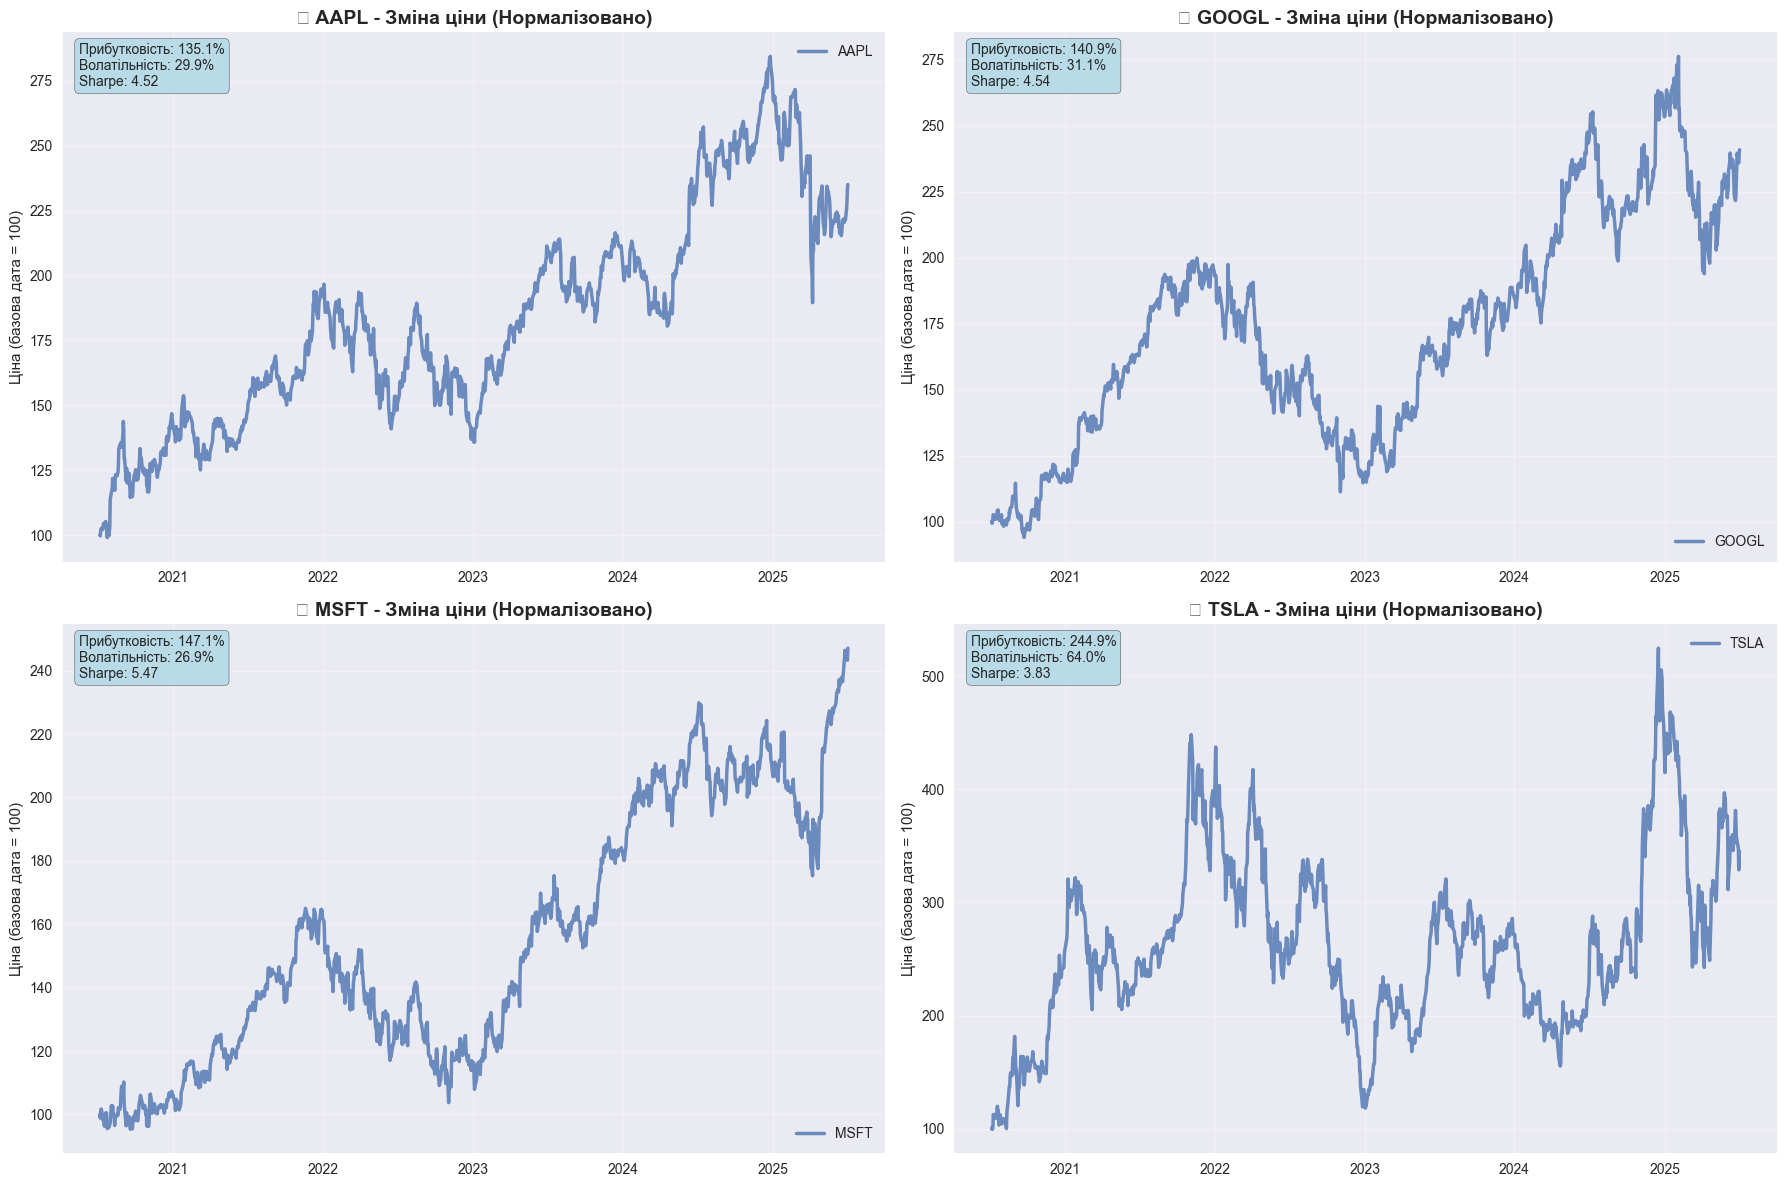

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

stats_summary = {}

for i, ticker in enumerate(tickers):
    data = data_dict[ticker]
    
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100
    
    axes[i].plot(data.index, normalized_price, linewidth=2.5, label=ticker, alpha=0.8)
    axes[i].set_title(f'📈 {ticker} - Зміна ціни (Нормалізовано)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Ціна (базова дата = 100)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    close_start = data['Close'].iloc[0]
    close_end = data['Close'].iloc[-1] 
    
    total_return_val = float(((close_end / close_start) - 1) * 100)
    volatility_val = float(data['Close'].pct_change().std() * np.sqrt(252) * 100)
    
    stats_summary[ticker] = {
        'return': total_return_val,
        'volatility': volatility_val,
        'sharpe': total_return_val / volatility_val if volatility_val > 0 else 0
    }
    
    stats_text = ('Прибутковість: ' + f'{total_return_val:.1f}' + '%\n' +
                  'Волатільність: ' + f'{volatility_val:.1f}' + '%\n' +
                  'Sharpe: ' + f'{stats_summary[ticker]["sharpe"]:.2f}')
    
    axes[i].text(0.02, 0.98, stats_text, 
                transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

Розмір матриці доходностей: (1255, 4)
Період: 2020-07-07 до 2025-07-03


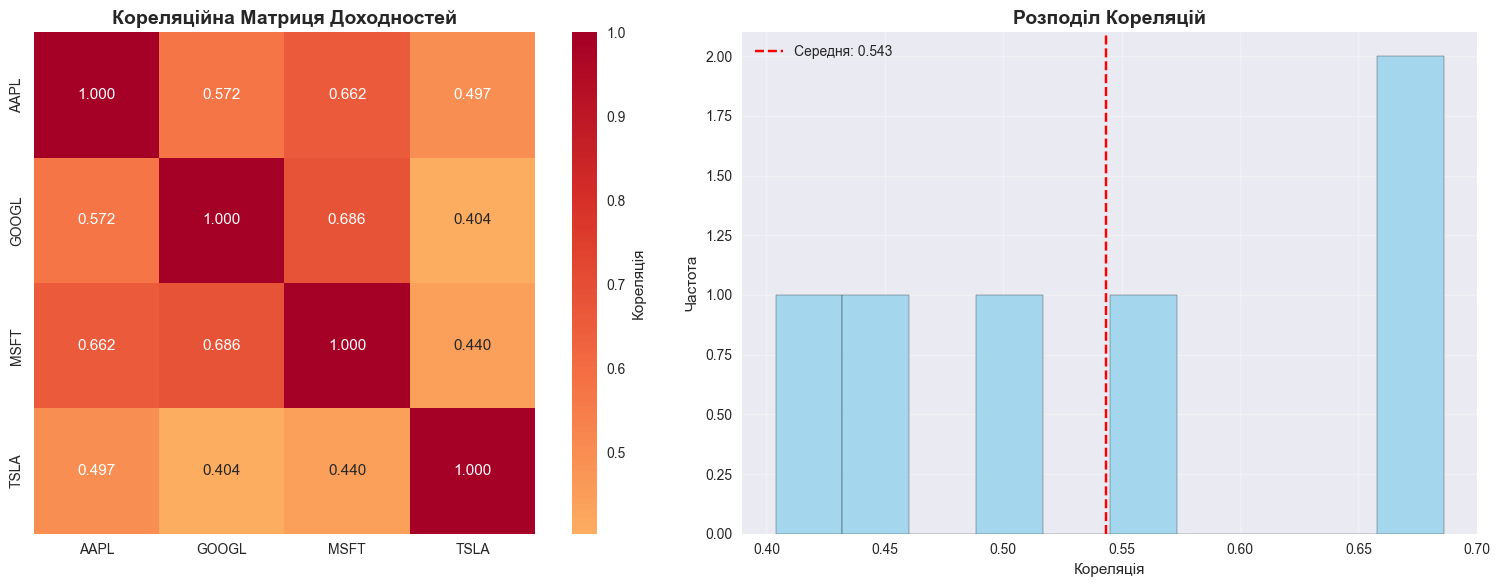

Найвища кореляція: GOOGL vs MSFT = 0.686
Найнижча кореляція: GOOGL vs TSLA = 0.404

Середня кореляція: 0.543
Стандартне відхилення: 0.106


In [4]:

combined_prices = pd.DataFrame()
for ticker in tickers:
    combined_prices[ticker] = data_dict[ticker]['Close']

returns = combined_prices.pct_change().dropna()

print(f"Розмір матриці доходностей: {returns.shape}")
print(f"Період: {returns.index.min().strftime('%Y-%m-%d')} до {returns.index.max().strftime('%Y-%m-%d')}")

correlation_matrix = returns.corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
           square=True, ax=axes[0], fmt='.3f', cbar_kws={'label': 'Кореляція'})
axes[0].set_title('Кореляційна Матриця Доходностей', fontsize=14, fontweight='bold')

correlations_flat = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, 1)]
axes[1].hist(correlations_flat, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_title('Розподіл Кореляцій', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Кореляція')
axes[1].set_ylabel('Частота')
axes[1].axvline(correlations_flat.mean(), color='red', linestyle='--', 
               label=f'Середня: {correlations_flat.mean():.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

max_corr_pair = np.unravel_index(np.argmax(correlation_matrix.values - np.eye(len(correlation_matrix))), 
                                correlation_matrix.shape)
max_corr_value = correlation_matrix.iloc[max_corr_pair]
max_corr_stocks = (correlation_matrix.index[max_corr_pair[0]], 
                  correlation_matrix.columns[max_corr_pair[1]])

print(f"Найвища кореляція: {max_corr_stocks[0]} vs {max_corr_stocks[1]} = {max_corr_value:.3f}")

min_corr_idx = correlation_matrix.values + np.eye(len(correlation_matrix))
min_corr_pair = np.unravel_index(np.argmin(min_corr_idx), correlation_matrix.shape)
min_corr_value = correlation_matrix.iloc[min_corr_pair]
min_corr_stocks = (correlation_matrix.index[min_corr_pair[0]], 
                  correlation_matrix.columns[min_corr_pair[1]])

print(f"Найнижча кореляція: {min_corr_stocks[0]} vs {min_corr_stocks[1]} = {min_corr_value:.3f}")

print(f"\nСередня кореляція: {correlations_flat.mean():.3f}")
print(f"Стандартне відхилення: {correlations_flat.std():.3f}")



       return  volatility  sharpe
AAPL   135.05       29.85    4.52
GOOGL  140.87       31.05    4.54
MSFT   147.11       26.88    5.47
TSLA   244.88       63.97    3.83


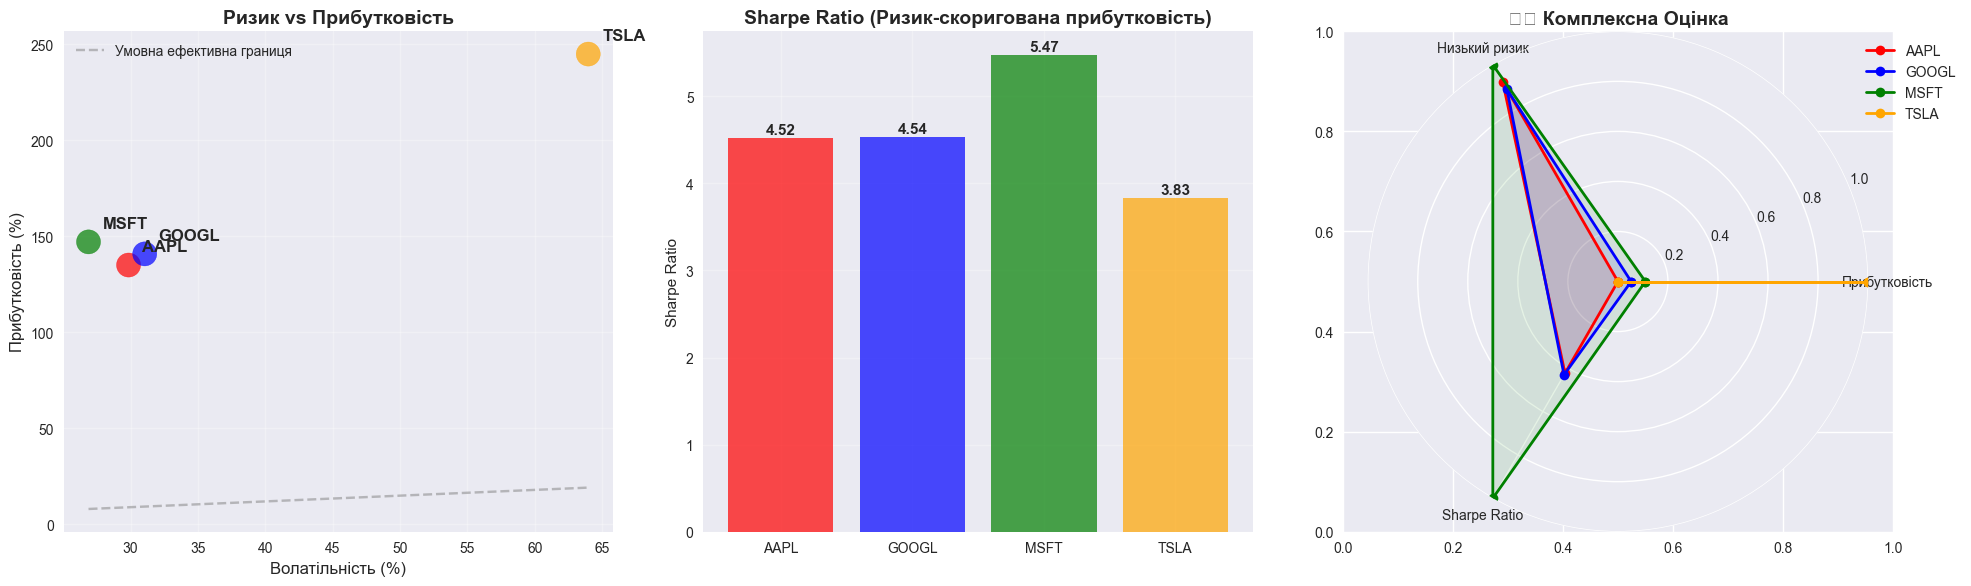

1 TSLA:
    Прибутковість: 244.9%
    Волатільність: 64.0%
    Sharpe Ratio: 3.83
    Комплексна оцінка: 86.69

2 MSFT:
    Прибутковість: 147.1%
    Волатільність: 26.9%
    Sharpe Ratio: 5.47
    Комплексна оцінка: 55.66

3 GOOGL:
    Прибутковість: 140.9%
    Волатільність: 31.1%
    Sharpe Ratio: 4.54
    Комплексна оцінка: 51.95

4 AAPL:
    Прибутковість: 135.1%
    Волатільність: 29.9%
    Sharpe Ratio: 4.52
    Комплексна оцінка: 49.86



In [5]:
risk_return_df = pd.DataFrame(stats_summary).T

print(risk_return_df.round(2))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].scatter(risk_return_df['volatility'], risk_return_df['return'], 
               s=300, alpha=0.7, c=['red', 'blue', 'green', 'orange'])

for ticker in risk_return_df.index:
    axes[0].annotate(ticker, 
                    (risk_return_df.loc[ticker, 'volatility'], 
                     risk_return_df.loc[ticker, 'return']),
                    xytext=(10, 10), textcoords='offset points', 
                    fontsize=12, fontweight='bold')

axes[0].set_xlabel('Волатільність (%)', fontsize=12)
axes[0].set_ylabel('Прибутковість (%)', fontsize=12)
axes[0].set_title('Ризик vs Прибутковість', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

vol_range = np.linspace(risk_return_df['volatility'].min(), 
                       risk_return_df['volatility'].max(), 100)
efficient_frontier = vol_range * 0.3 
axes[0].plot(vol_range, efficient_frontier, '--', color='gray', alpha=0.5, 
            label='Умовна ефективна границя')
axes[0].legend()

colors = ['red', 'blue', 'green', 'orange'][:len(risk_return_df)]
bars = axes[1].bar(risk_return_df.index, risk_return_df['sharpe'], color=colors, alpha=0.7)
axes[1].set_title('Sharpe Ratio (Ризик-скоригована прибутковість)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sharpe Ratio')
axes[1].grid(True, alpha=0.3)

for bar, sharpe in zip(bars, risk_return_df['sharpe']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{sharpe:.2f}', ha='center', va='bottom', fontweight='bold')

categories = ['Прибутковість', 'Низький ризик', 'Sharpe Ratio']

normalized_data = {}
for ticker in risk_return_df.index:
    normalized_data[ticker] = [
        (risk_return_df.loc[ticker, 'return'] - risk_return_df['return'].min()) / 
        (risk_return_df['return'].max() - risk_return_df['return'].min()),
        
        1 - (risk_return_df.loc[ticker, 'volatility'] - risk_return_df['volatility'].min()) / 
        (risk_return_df['volatility'].max() - risk_return_df['volatility'].min()),
        
        (risk_return_df.loc[ticker, 'sharpe'] - risk_return_df['sharpe'].min()) / 
        (risk_return_df['sharpe'].max() - risk_return_df['sharpe'].min())
    ]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

ax_radar = plt.subplot(1, 3, 3, projection='polar')

for i, (ticker, values) in enumerate(normalized_data.items()):
    values = np.concatenate((values, [values[0]]))
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=ticker, color=colors[i])
    ax_radar.fill(angles, values, alpha=0.1, color=colors[i])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('🕸️ Комплексна Оцінка', fontsize=14, fontweight='bold')
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.tight_layout()
plt.show()

risk_return_df['risk_adjusted_return'] = risk_return_df['return'] / risk_return_df['volatility']
risk_return_df['score'] = (risk_return_df['return'] * 0.4 + 
                          risk_return_df['sharpe'] * 0.4 - 
                          risk_return_df['volatility'] * 0.2)

ranking = risk_return_df.sort_values('score', ascending=False)

for i, (ticker, row) in enumerate(ranking.iterrows()):
    medal = ['1', '2', '3', '4'][i]
    print(f"{medal} {ticker}:")
    print(f"    Прибутковість: {row['return']:.1f}%")
    print(f"    Волатільність: {row['volatility']:.1f}%") 
    print(f"    Sharpe Ratio: {row['sharpe']:.2f}")
    print(f"    Комплексна оцінка: {row['score']:.2f}")
    print()


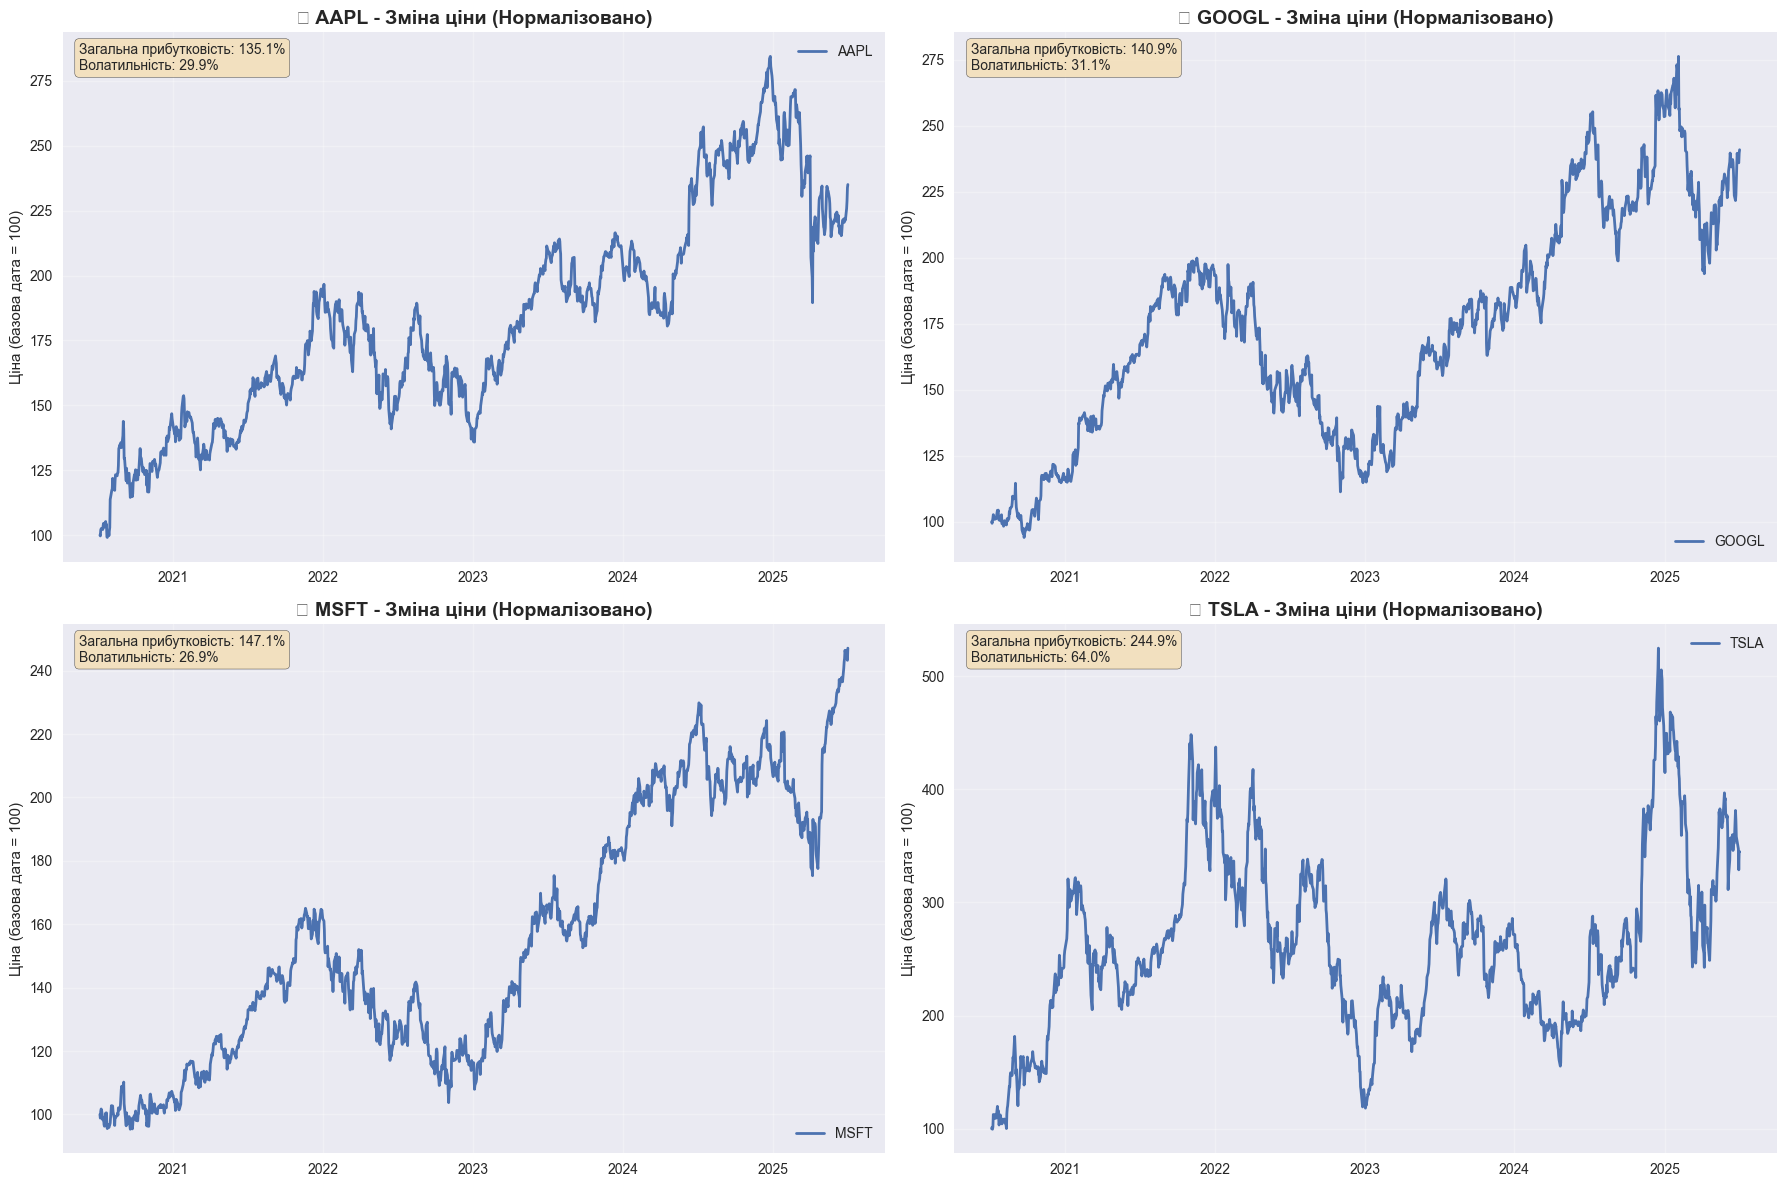

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    data = data_dict[ticker]
    
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100
    
    axes[i].plot(data.index, normalized_price, linewidth=2, label=ticker)
    axes[i].set_title(f'📈 {ticker} - Зміна ціни (Нормалізовано)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Ціна (базова дата = 100)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    total_return = float((data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100)
    volatility = float(data['Close'].pct_change().std() * np.sqrt(252) * 100)
    
    axes[i].text(0.02, 0.98, f'Загальна прибутковість: {total_return:.1f}%\nВолатильність: {volatility:.1f}%', 
                transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()
